# **Image Reconstruction using A star**

**Importing Necessary Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

**Slitting the image into patches and shuffling it**

In [ ]:
num_patches=8
def Random_Shuffle(linear:list(),blank_i,x:int =100):

    for i in range(x):
        row = blank_i // num_patches
        col = blank_i % num_patches
        neighbor_indices = []
        # Check above
        if row > 0:
            neighbor_indices.append((row - 1) * num_patches + col)
        # Check left
        if col > 0:
            neighbor_indices.append(row * num_patches + (col - 1))
        # Check right
        if col < num_patches - 1:
            neighbor_indices.append(row * num_patches + (col + 1))
        # Check below
        if row < num_patches - 1:
            neighbor_indices.append((row + 1) * num_patches + col)

        new_blank = random.choice(neighbor_indices)
        temp = linear[blank_i]
        linear[blank_i] = linear[new_blank]
        linear[new_blank] = temp
        blank_i = new_blank

    return linear

In [ ]:
linear = list()

def Image_Puzzle(path_img:str, patch_size:int = 16):
    img = Image.open(path_img)
    img = img.resize((512,512))

    img = np.asarray(img)
    img_size = img.shape[0]

    num_patches = img_size//patch_size

    for i,patch_height in enumerate(range(0, img_size, patch_size)):
        for j,patch_width in enumerate(range(0, img_size, patch_size)):
            image = img[patch_height:patch_height+patch_size,
                      patch_width:patch_width+patch_size]
            linear.append(image)
    linear[-1] = np.zeros_like(image)
    linear2 = linear.copy()

    #select the number of shuffles
    #here 10 are selected as for the more shuffles you do, it will become impossible for A* to reconstruct image

    linear2 = Random_Shuffle(linear2,len(linear)-1,10)

    #Graph making
    shuffled_grid = {}
    original_grid = {}
    i = 0
    for x in range(0,num_patches):
        for y in range(0,num_patches):
            if np.array_equiv(linear2[i],np.zeros_like(image)):
                blank = (x,y)
            shuffled_grid[(x,y)] = linear2[i]
            original_grid[(x,y)] = linear[i]
            i+=1



    return original_grid, shuffled_grid , blank ,num_patches
# replace  it with your own image
original_grid, shuffled_grid ,blank, num_patches= Image_Puzzle('/content/IMG.jpg',64)       #Returns two grids: 1. original, 2. Shuffled
                                                                                   # 3.Blank square (x,y) in shuffled grid, 4.num_patches

                                                            #last portion of grid i.e grid[(63,63)] is blank with color of black




**Fuction to image using pathes dictionary**

In [ ]:
def plot_grid(grid:dict(), num_patches = 32):
    img = 0
    for i in range(0,num_patches):
        patch = grid[i,0]
        for j in range(1,num_patches):
            patch = np.hstack((patch,grid[i,j]))

        if (isinstance(img, int)):
            img = patch
        else:
            img = np.vstack((img,patch))
    plt.imshow(img)
    plt.axis(False)
    plt.show()

**Original Image**

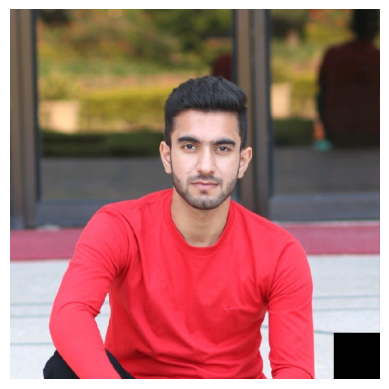

In [ ]:
plot_grid(original_grid,num_patches)

**Shuffled Image**

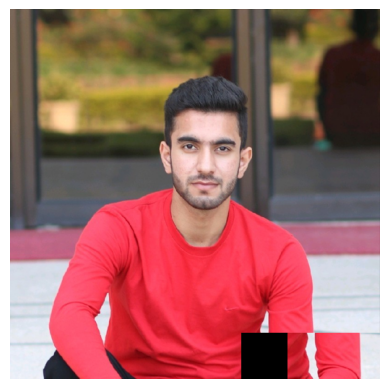

In [ ]:
plot_grid(shuffled_grid,num_patches)

**Making 2d matrix from the 3d grid values.**
Each path was (64,64,3) and we had 8x8 patches. So making a new array of 8x8 with values of sum of each patch as a representation of the actual grid to reduce computation for A star as we will be using this 8x8 grid instead of 8x8x64x3.

In [ ]:
original= list(original_grid.values())
arr_3d = np.sum(original, axis=2)

# Reshape the 3D array into a 2D array by computing the sum of each 8x8 block
arr_2d = np.sum(arr_3d.reshape(8, 8, 64, 3), axis=(2, 3))

array([[[156, 135,  55],
        [155, 133,  57],
        [152, 131,  57],
        ...,
        [121, 106,  57],
        [122, 106,  57],
        [121, 105,  56]],

       [[156, 135,  56],
        [156, 134,  58],
        [154, 133,  59],
        ...,
        [122, 107,  58],
        [123, 108,  59],
        [124, 108,  59]],

       [[156, 135,  56],
        [156, 134,  58],
        [154, 133,  59],
        ...,
        [125, 109,  59],
        [126, 109,  59],
        [125, 108,  59]],

       ...,

       [[138, 122,  56],
        [141, 125,  59],
        [142, 127,  59],
        ...,
        [164, 145,  48],
        [163, 144,  47],
        [162, 143,  46]],

       [[154, 134,  69],
        [157, 138,  72],
        [158, 138,  72],
        ...,
        [157, 138,  44],
        [156, 138,  44],
        [155, 137,  43]],

       [[168, 145,  80],
        [170, 146,  80],
        [171, 147,  81],
        ...,
        [150, 133,  41],
        [150, 133,  42],
        [150, 133,  43]]], dtype=uint8)
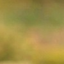

In [ ]:
original_grid[(1,1)]

In [ ]:
shuff= list(shuffled_grid.values())
arr_3dS = np.sum(shuff, axis=2)

# Reshape the 3D array into a 2D array by computing the sum of each 8x8 block
arr_2dS = np.sum(arr_3dS.reshape(8, 8, 64, 3), axis=(2, 3))

In [ ]:
arr_2d.shape, arr_2dS.shape

((8, 8), (8, 8))

**Funtion to get the possible states for A star**

In [ ]:
import copy


def states(init):

    current_state=[]
    x=np.where(init==0)
    base_index=[x[0][0],x[1][0]]
    base=[x[0][0],x[1][0]]
    #print(init)
    if((base_index[0]==len(init)-1 or base_index[0]==0) and (base_index[1]!=len(init)-1 and base_index[1] != 0)):
        moves= 3
          # the original array
        copies=[]

        copies = [copy.deepcopy(init) for i in range(moves)]

        base_index[1]+=1
        copies[0][base[0]][base[1]] = copies[0][base[0]][base_index[1]]
        copies[0][base[0]][base_index[1]]=0

        base_index[1]-=1

        base_index[1]-=1
        copies[1][base[0]][base[1]] = copies[1][base[0]][base_index[1]]
        copies[1][base[0]][base_index[1]]=0

        base_index[1]+=1

        if(base[0]==len(init)-1):
            base_index[0]-=1
            copies[2][base[0]][base[1]] = copies[2][base_index[0]][base[1]]
            copies[2][base_index[0]][base[1]]=0

            base_index[0]+=1
        else:
            base_index[0]+=1
            copies[2][base[0]][base[1]] = copies[2][base_index[0]][base[1]]
            copies[2][base_index[0]][base[1]]=0

            base_index[0]-=1
        for i in range(moves):
            if any(np.array_equiv(copies[i], state) for state in main_states):
                #print('already there')
                pass
            else:
                main_states.append(copies[i])
                current_state.append(copies[i])


    elif((base_index[0]!=len(init)-1 and base_index[0]!=0) and (base_index[1]==len(init)-1 or base_index[1] == 0)):
        moves= 3
          # the original array
        copies=[]

        copies = [copy.deepcopy(init) for i in range(moves)]

        base_index[0]+=1
        copies[0][base[0]][base[1]] = copies[0][base_index[0]][base[1]]
        copies[0][base_index[0]][base[1]]=0

        base_index[0]-=1

        base_index[0]-=1
        copies[1][base[0]][base[1]] = copies[1][base_index[0]][base[1]]
        copies[1][base_index[0]][base[1]]=0

        base_index[0]+=1

        if(base[1]==len(init)-1):
            base_index[1]-=1
            copies[2][base[0]][base[1]] = copies[2][base[0]][base_index[1]]
            copies[2][base[0]][base_index[1]]=0

            base_index[1]+=1
        else:
            base_index[1]+=1
            copies[2][base[0]][base[1]] = copies[2][base[0]][base_index[1]]
            copies[2][base[0]][base_index[1]]=0

            base_index[1]-=1
        for i in range(moves):
            if any(np.array_equiv(copies[i], state) for state in main_states):
                #print('already there')
                pass
            else:
                main_states.append(copies[i])
                current_state.append(copies[i])

    elif(base_index[0]!=len(init)-1 and base_index[0]!=0 and base_index[1]!=len(init)-1 and base_index[1] != 0):
        moves= 4
          # the original array
        copies=[]

        copies = [copy.deepcopy(init) for i in range(moves)]

        base_index[0]+=1
        copies[0][base[0]][base[1]] = copies[0][base_index[0]][base[1]]
        copies[0][base_index[0]][base[1]]=0

        base_index[0]-=1

        base_index[0]-=1
        copies[1][base[0]][base[1]] = copies[1][base_index[0]][base[1]]
        copies[1][base_index[0]][base[1]]=0

        base_index[0]+=1

        base_index[1]+=1
        copies[2][base[0]][base[1]] = copies[2][base[0]][base_index[1]]
        copies[2][base[0]][base_index[1]]=0

        base_index[1]-=1

        base_index[1]-=1
        copies[3][base[0]][base[1]] = copies[3][base[0]][base_index[1]]
        copies[3][base[0]][base_index[1]]=0

        base_index[1]+=1

        for i in range(moves):
            if any(np.array_equiv(copies[i], state) for state in main_states):
                #print('already there')
                pass
            else:
                main_states.append(copies[i])
                current_state.append(copies[i])

    else:
        #print('yes')
        moves=2
        copies=[]

        copies = [copy.deepcopy(init) for i in range(moves)]
        if(base[0]==0):
            if(base[1]==0):
                base_index[0]+=1
                copies[0][base[0]][base[1]] = copies[0][base_index[0]][base[1]]
                copies[0][base_index[0]][base[1]]=0

                base_index[0]-=1

                base_index[1]+=1
                copies[1][base[0]][base[1]] = copies[1][base[0]][base_index[1]]
                copies[1][base[0]][base_index[1]]=0

                base_index[1]-=1
            elif(base[1]==len(init)-1):
                base_index[0]+=1
                copies[0][base[0]][base[1]] = copies[0][base_index[0]][base[1]]
                copies[0][base_index[0]][base[1]]=0

                base_index[0]-=1


                base_index[1]-=1
                copies[1][base[0]][base[1]] = copies[1][base[0]][base_index[1]]
                copies[1][base[0]][base_index[1]]=0

                base_index[1]+=1

        elif(base[0]==len(init)-1):
            if(base[1]==0):

                base_index[0]-=1
                copies[0][base[0]][base[1]] = copies[0][base_index[0]][base[1]]
                copies[0][base_index[0]][base[1]]=0

                base_index[0]+=1

                base_index[1]+=1
                copies[1][base[0]][base[1]] = copies[1][base[0]][base_index[1]]
                copies[1][base[0]][base_index[1]]=0

                base_index[1]-=1

            elif(base[1]==len(init)-1):
                base_index[0]-=1
                copies[0][base[0]][base[1]] = copies[0][base_index[0]][base[1]]
                copies[0][base_index[0]][base[1]]=0

                base_index[0]+=1

                base_index[1]-=1
                copies[1][base[0]][base[1]] = copies[1][base[0]][base_index[1]]
                copies[1][base[0]][base_index[1]]=0

                base_index[1]+=1
        for i in range(moves):
            if any(np.array_equiv(copies[i], state) for state in main_states):
                #print('already there')
                pass
            else:
                main_states.append(copies[i])
                current_state.append(copies[i])

    return current_state



**A star working**

In [ ]:

init  = np.array(arr_2dS)
final = np.array(arr_2d)
main_states=[init]

ins=[states(init)]
g=1
while(not(any(np.array_equiv(final, state) for state in ins[0]))):
    f=[]
    for y in ins[0]:
            if(np.where(y==0)==np.where(final==0)):
                f.append(final.shape[0]*final.shape[0]-np.equal(y,final).sum()+g)
            else:
                f.append((final.shape[0]*final.shape[0]-1)-np.equal(y,final).sum()+g)

    min_indexes=[]
    for k in range(len(f)):
        if(f[k]==min(f)):
            min_indexes.append(k)
    temp=list()
    for m in min_indexes:
        temp.append(states(ins[0][m]))
    ins[0]=[]
    for x in temp:
        for y in x:
            ins[0].append(y)
    g+=1
print('..........Reached Final state.........\n--------Yahoooo---------')
eq=[]
for r in ins[0]:

    eq.append(np.equal(r,final).sum())
    final_result= ins[0][np.array(eq).argmax()]
print(final_result)


..........Reached Final state.........
--------Yahoooo---------
[[1087541 1109900 1160145  805861  804070  970547 1108076  563910]
 [1232101 1539251 1502409 1235093  806492 1269752 1087589  338816]
 [1165072 1446504 1128105 1330190 1805634 1021755  787356  364990]
 [ 979447  973886  950197 1742707 2097539 1083786  982573  896426]
 [1229768 1408352 1613814 1725531 1667917 1379887 1453830 1469911]
 [2269839 1893531 1382979 1585010 1602278 1624446 2088186 2381380]
 [2687412 1859425 1427135 1469071 1418853 1387086 2182771 2781421]
 [2593049 1606978 1137995 1186157 1338509 1594655 2225365       0]]


In [ ]:
import numpy as np

# Convert the original list to a NumPy array
original = np.array(list(original_grid.values()))

# Compute the sum of each 8x8 block
arr_3d = np.sum(original, axis=2)

# Reshape the 3D array into a 2D array by computing the sum of each 8x8 block
arr_2d = np.sum(arr_3d.reshape(8, 8, 64, 3), axis=(2, 3))

# Create a dictionary mapping the sum of each 8x8 block to its corresponding depths
depths_dict = {}
for i in range(8):
    for j in range(8):
        depths_dict[arr_2d[i, j]] = original[i*8:(i+1)*8, j*8:(j+1)*8, :]

# Map arr_2d to the actual grid using the depths_dict
Final_grid = np.zeros_like(original)
for i in range(8):
    for j in range(8):
        Final_grid [i*8:(i+1)*8, j*8:(j+1)*8, :] = depths_dict[final_result[i, j]]

# Convert the actual_grid back to a dictionary
Final_grid_dict = {}
for i, key in enumerate(original_grid.keys()):
    Final_grid_dict[key] = Final_grid [i]

In [ ]:
final_result

array([[1087541, 1109900, 1160145,  805861,  804070,  970547, 1108076,
         563910],
       [1232101, 1539251, 1502409, 1235093,  806492, 1269752, 1087589,
         338816],
       [1165072, 1446504, 1128105, 1330190, 1805634, 1021755,  787356,
         364990],
       [ 979447,  973886,  950197, 1742707, 2097539, 1083786,  982573,
         896426],
       [1229768, 1408352, 1613814, 1725531, 1667917, 1379887, 1453830,
        1469911],
       [2269839, 1893531, 1382979, 1585010, 1602278, 1624446, 2088186,
        2381380],
       [2687412, 1859425, 1427135, 1469071, 1418853, 1387086, 2182771,
        2781421],
       [2593049, 1606978, 1137995, 1186157, 1338509, 1594655, 2225365,
              0]], dtype=uint64)

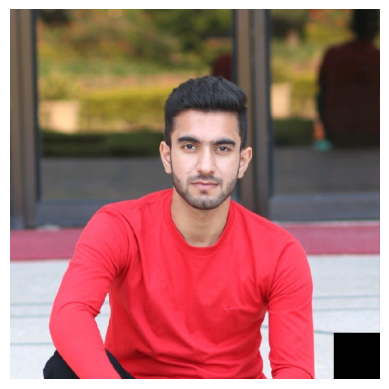

In [ ]:
plot_grid(Final_grid_dict,num_patches)